# Método de análisis basado en técnicas de clustering para la detección de daño estructural 

El presente trabajo de investigación forma parte del proyecto de monitorización del estado de salud estructural del Sydney Harbour Bridge (Australia).

Los objetivos del método planteado son:
   1. Identificar clusters de las partes del puente que presentan un comportamiento similar, a partir de los datos monitorizados
   2. Complementar las técnicas actuales de detección de daño estructural
   3. Conocer el comportamiento global del puente

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# librerías genéricas que utilizaremos
from pandas import DataFrame, read_csv
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from datetime import datetime
from scipy.fftpack import fft
import scipy.signal.signaltools as sigtool
import sklearn.preprocessing as pre
from sklearn.cross_validation import train_test_split

# especificamos variables globales, como por ejemplo el directorio donde tenemos los datos
import glob, os
path = r'./data/71_nodes/' 

# cargamos nuestro métodos
%run outliers_removal.py
%run data_processing.py
%run kmeans.py
%run map_pairwise_distances.py

## Caso de estudio 1: ejercicios

- 6 juntas del segmento Norte del puente monitorizadas durante una semana
- La junta número 4 presenta daño estructural en forma de grietas
- Los eventos son registrados y estandarizados a series temporales de 600 valores

In [ ]:
# cargamos los datos
all_files = glob.glob(os.path.join(path, "data_6nodes_chunk*.csv"))
df_from_each_file = (pd.read_csv(f, index_col=0) for f in all_files)
datav1 = pd.concat(df_from_each_file)
# ¿cuántos vectores de características tenemos y de qué tamaño son?
print ('Dimensiones de los datos de entrada: ' + str(datav1.shape))

## Un primer vistazo a los datos

In [ ]:
# graficamos un vector de características
plt.figure(figsize=(24, 12))
plt.plot(datav1.values[0], lw=3)
plt.xlabel('time (s)', fontsize=24)
plt.ylabel('magnitude', fontsize=24)
plt.tick_params(labelsize=20)
plt.ylim(-11,11)
plt.grid()
plt.show()

## Preprocesado

In [ ]:
# estandarización de los datos
from numpy import mean, std
datav1 = (datav1.values - mean(datav1.values, axis=0)) / std(datav1.values, axis=0)

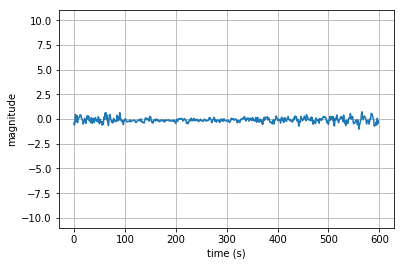

In [4]:
# mostramos un vector de características tras estandarizar los datos originales
plt.figure(figsize=(24, 12))
plt.plot(datav1[0], lw=3)
plt.xlabel('time (s)', fontsize=24)
plt.ylabel('magnitude', fontsize=24)
plt.tick_params(labelsize=20)
plt.ylim(-11,11)
plt.grid()
plt.show() 

## Información contextual: posición y distribución de las juntas del puente

In [5]:
joints=np.array(joints)
joints=joints.reshape(joints.shape[0])
joints_dist = [[1],[2],[3],[4],[5],[6]]

## Eliminar outliers y ruido de los datos

In [6]:
'''
Método que elimina outliers para limpiar y hacer un remuestreo de los datos, de tal modo que para cada junta eliminamos los eventos cuya energía está lejos de la media. 
    Entradas:
        - data: conjunto de datos de entrenamiento, con los eventos que vamos a procesar (matrix [m,n])
        - index: la lista de juntas a las que pertenece cada evento (array [m])
        - k: número de vecinos a considerar por el KDTree y máximo número de eventos a obtener por junta
        - normalityLoops: criterio de parada principal
        - anomaly_threshold: desviaciones típicas respecto de la media a utilizar
    Salidas: (reduced_data, reduced_index, samples_distribution) objetos que contienen los datos procesados, las etiquetas (juntas) correspondientes y la distribución final de juntas resultantes 
'''
# utilizar un número diferente de vecinos, 'k', iteraciones, 'normalityLoops' y desviaciones típicas, 'anomaly_threshold'
reduced_data, reduced_index, samples_distribution, removed_data, removed_index = outliers_removal(datav1, 
                                                                                                  joints, 
                                                                                                  k=5000, 
                                                                                                  normalityLoops=1,
                                                                                                  anomaly_threshold=2)
# mostramos el número de muestras resultantes
print ('Dimensiones de los datos procesados: ' + str(reduced_data.shape))


Joint 1
Iteration 1
5000


/usr/local/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Average distance: 12.032170
Max distance: 18.605238
Setting threshold to  14.509899
Number of samples removed: 1326
Number of iterations reached. Exiting

Joint 2
Iteration 1
5000


/usr/local/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Average distance: 14.835527
Max distance: 21.843029
Setting threshold to  17.874529
Number of samples removed: 2239
Number of iterations reached. Exiting

Joint 3
Iteration 1
4985


/usr/local/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Average distance: 62.608093
Max distance: 826.241331
Setting threshold to  94.022491
Number of samples removed: 296
Number of iterations reached. Exiting

Joint 4
Iteration 1
5000


/usr/local/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Average distance: 1508.483484
Max distance: 2264.088324
Setting threshold to  1826.903556
Number of samples removed: 1888
Number of iterations reached. Exiting

Joint 5
Iteration 1
5000


/usr/local/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Average distance: 277.377037
Max distance: 312.332516
Setting threshold to  312.500226
Number of samples removed: 1717
Maximum distance is small enough. Exiting

Joint 6
Iteration 1
4802


/usr/local/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Average distance: 89.038303
Max distance: 2568.557988
Setting threshold to  169.489235
Number of samples removed: 144
Number of iterations reached. Exiting
Dimensiones de los datos procesados: (29343, 599)


## Transformada de Fourier (FFT): del dominio temporal al dominio en frecuencias

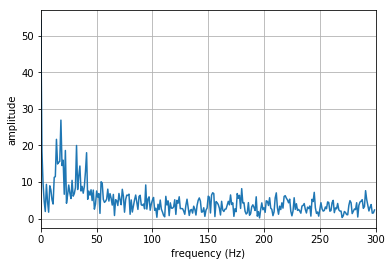

In [7]:
# aplicamos FFT a los datos estandarizados
reduced_data_fft = np.fft.rfft(reduced_data)
reduced_data_fft = np.abs(reduced_data_fft)

In [ ]:
# mostramos una señal en frecuencias resultante
plt.figure(figsize=(24, 12))
plt.plot(reduced_data_fft[100], lw=3)
plt.xlabel('frequency (Hz)', fontsize=24)
plt.ylabel('amplitude', fontsize=24)
plt.tick_params(labelsize=20)
plt.xlim(0,300)
plt.grid()
plt.show()

## Clustering basado en eventos: K-medias (distancia Euclídea)

In [ ]:
# probar con los datos originales y con un número diferente de clusters, 'n_clusters'
from sklearn.cluster import KMeans
'''
Método K-medias basado en la implementación de sklearn.
    Entradas:
        - data: conjunto de datos de entrenamiento, con los eventos que vamos a procesar (matrix [m,n])
        - n_clusters: número de clusters a utilizar
    Outputs: (Z, centroids, kmeans) array que contiene el cluster al que pertenece cada evento (array [m]), centroides o valores medios (matrix [m, n_clusters]) y el modelo kmeans resultante
'''
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=20)
kmeans.fit(reduced_data_fft)
Z = kmeans.labels_ 

Sumatorio de distancias de los eventos a los centroides de los clusters más cercanos: 1013350293.74


AttributeError: Unknown property figsize

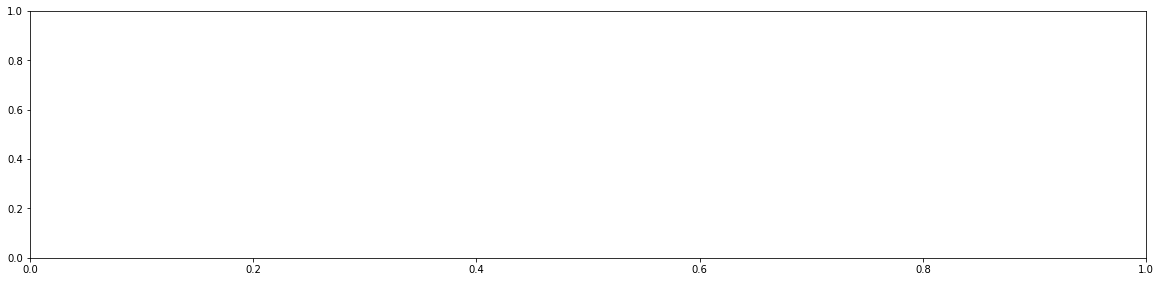

In [8]:
# obtenemos los centroides
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_      
print('Sumatorio de distancias de los eventos a los centroides de los clusters más cercanos: ' + str(inertia))
final_u = Z 
final_centroids = centroids
final_dist = kmeans

In [ ]:
'''
Método que muestra los resultados del clustering.
    Entradas:
        - data: conjunto de datos con los eventos que vamos a procesar (matrix [m,n])
        - index: la lista de juntas a las que pertenece cada evento (array [m])
        - samples_distribution: distribución de las juntas, una fila por cada set de jutas que pertenecen a una misma zona del puente y que tendrán el mismo color en el grafo
        - centroids: centroides o valores medios (matrix [m, n_clusters])
        - Z: array que contiene el cluster al que pertenece cada evento (array [m])
        - njoints: 6 o 71, en base al caso de estudio planteado
    Salidas: cada cluster se representa mediante 2 grafos, el de la parte superior muestra el centroide y la desviación típica de los eventos agrupados en el cluster y en la parte inferior se muestra la distribución de los eventos
'''
draw_clustering_results(reduced_data_fft,reduced_index,joints_dist,final_centroids,final_u,njoints=6)

## Clustering basado en juntas: mapa de distancias entre los representantes de las juntas

In [ ]:
# probar con los datos originales
'''
Método que calcula la media de los eventos correspondientes a cada junta (señales representativas de cada junta).
    Entradas:
        - data: conjunto de datos de entrenamiento, con los eventos que vamos a procesar (matrix [m,n])
        - labels: la lista de juntas a las que pertenece cada evento (array [m])
        - samples_distribution: distribución de las juntas, una fila por cada set de jutas que pertenecen a una misma zona del puente y que tendrán el mismo color en el grafo
    Salidas: (means, joints) las señales representativas de cada junta, o valores medios (matrix [j,n], j=número de juntas diferentes) y joints la lista con las etiquetas de las juntas (array [j])
'''    
means, joints = calculate_joints_means(reduced_data_fft, reduced_index, joints_dist)

In [ ]:
# probar usando otras métricas de distancia: ¿con cuál se obtienen los mejores resultados?
'''
Método que crea un mapa o matriz de distancias.
    Entradas:
        - centroids: los representates de las juntas (matrix [j,n])            
        - labels: las etiquetas de las juntas (array [j])        
        - weights: pesos de los centroides (array [m]) 
        - distance: métrica de distancia a aplicar: Euclidean, Manhattan, Correlation, Minkowski, Minkowski_pthPower, Chebyshev
        - p: pthPower utilizado en la distancia de Minkowski
    Salidas: (global_matrix) el mapa o matriz de distancias resultante (matrix [m,m])
''' 
draw_matrix_of_distances(means, joints, njoints=6, weights=None, distance='Euclidean', p=0.1)

## Conclusiones

- Los resultados experimentales demuestran que el método propuesto es capaz de detectar daño estructural y anomalías en los datos de manera precisa: 
- En el caso de estudio 1, con datos de 6 juntas, se detectó la presencia de grietas en una de ellas
- El método propuesto se aplica en tiempo real para establecer el estado de salud de la estructura, en base a las distancias a los modelos obtenidos, y así poder tomar decisiones de negocio que aseguren el tráfico rodado seguro y un servicio eficiente y fiable
